# Phenotype data preprocessing


**This tutorial contains examples on running the pink,blue,purple, and green section of the following diagram.**


> ../images/data_preprocessing.png (544.5 KiB):

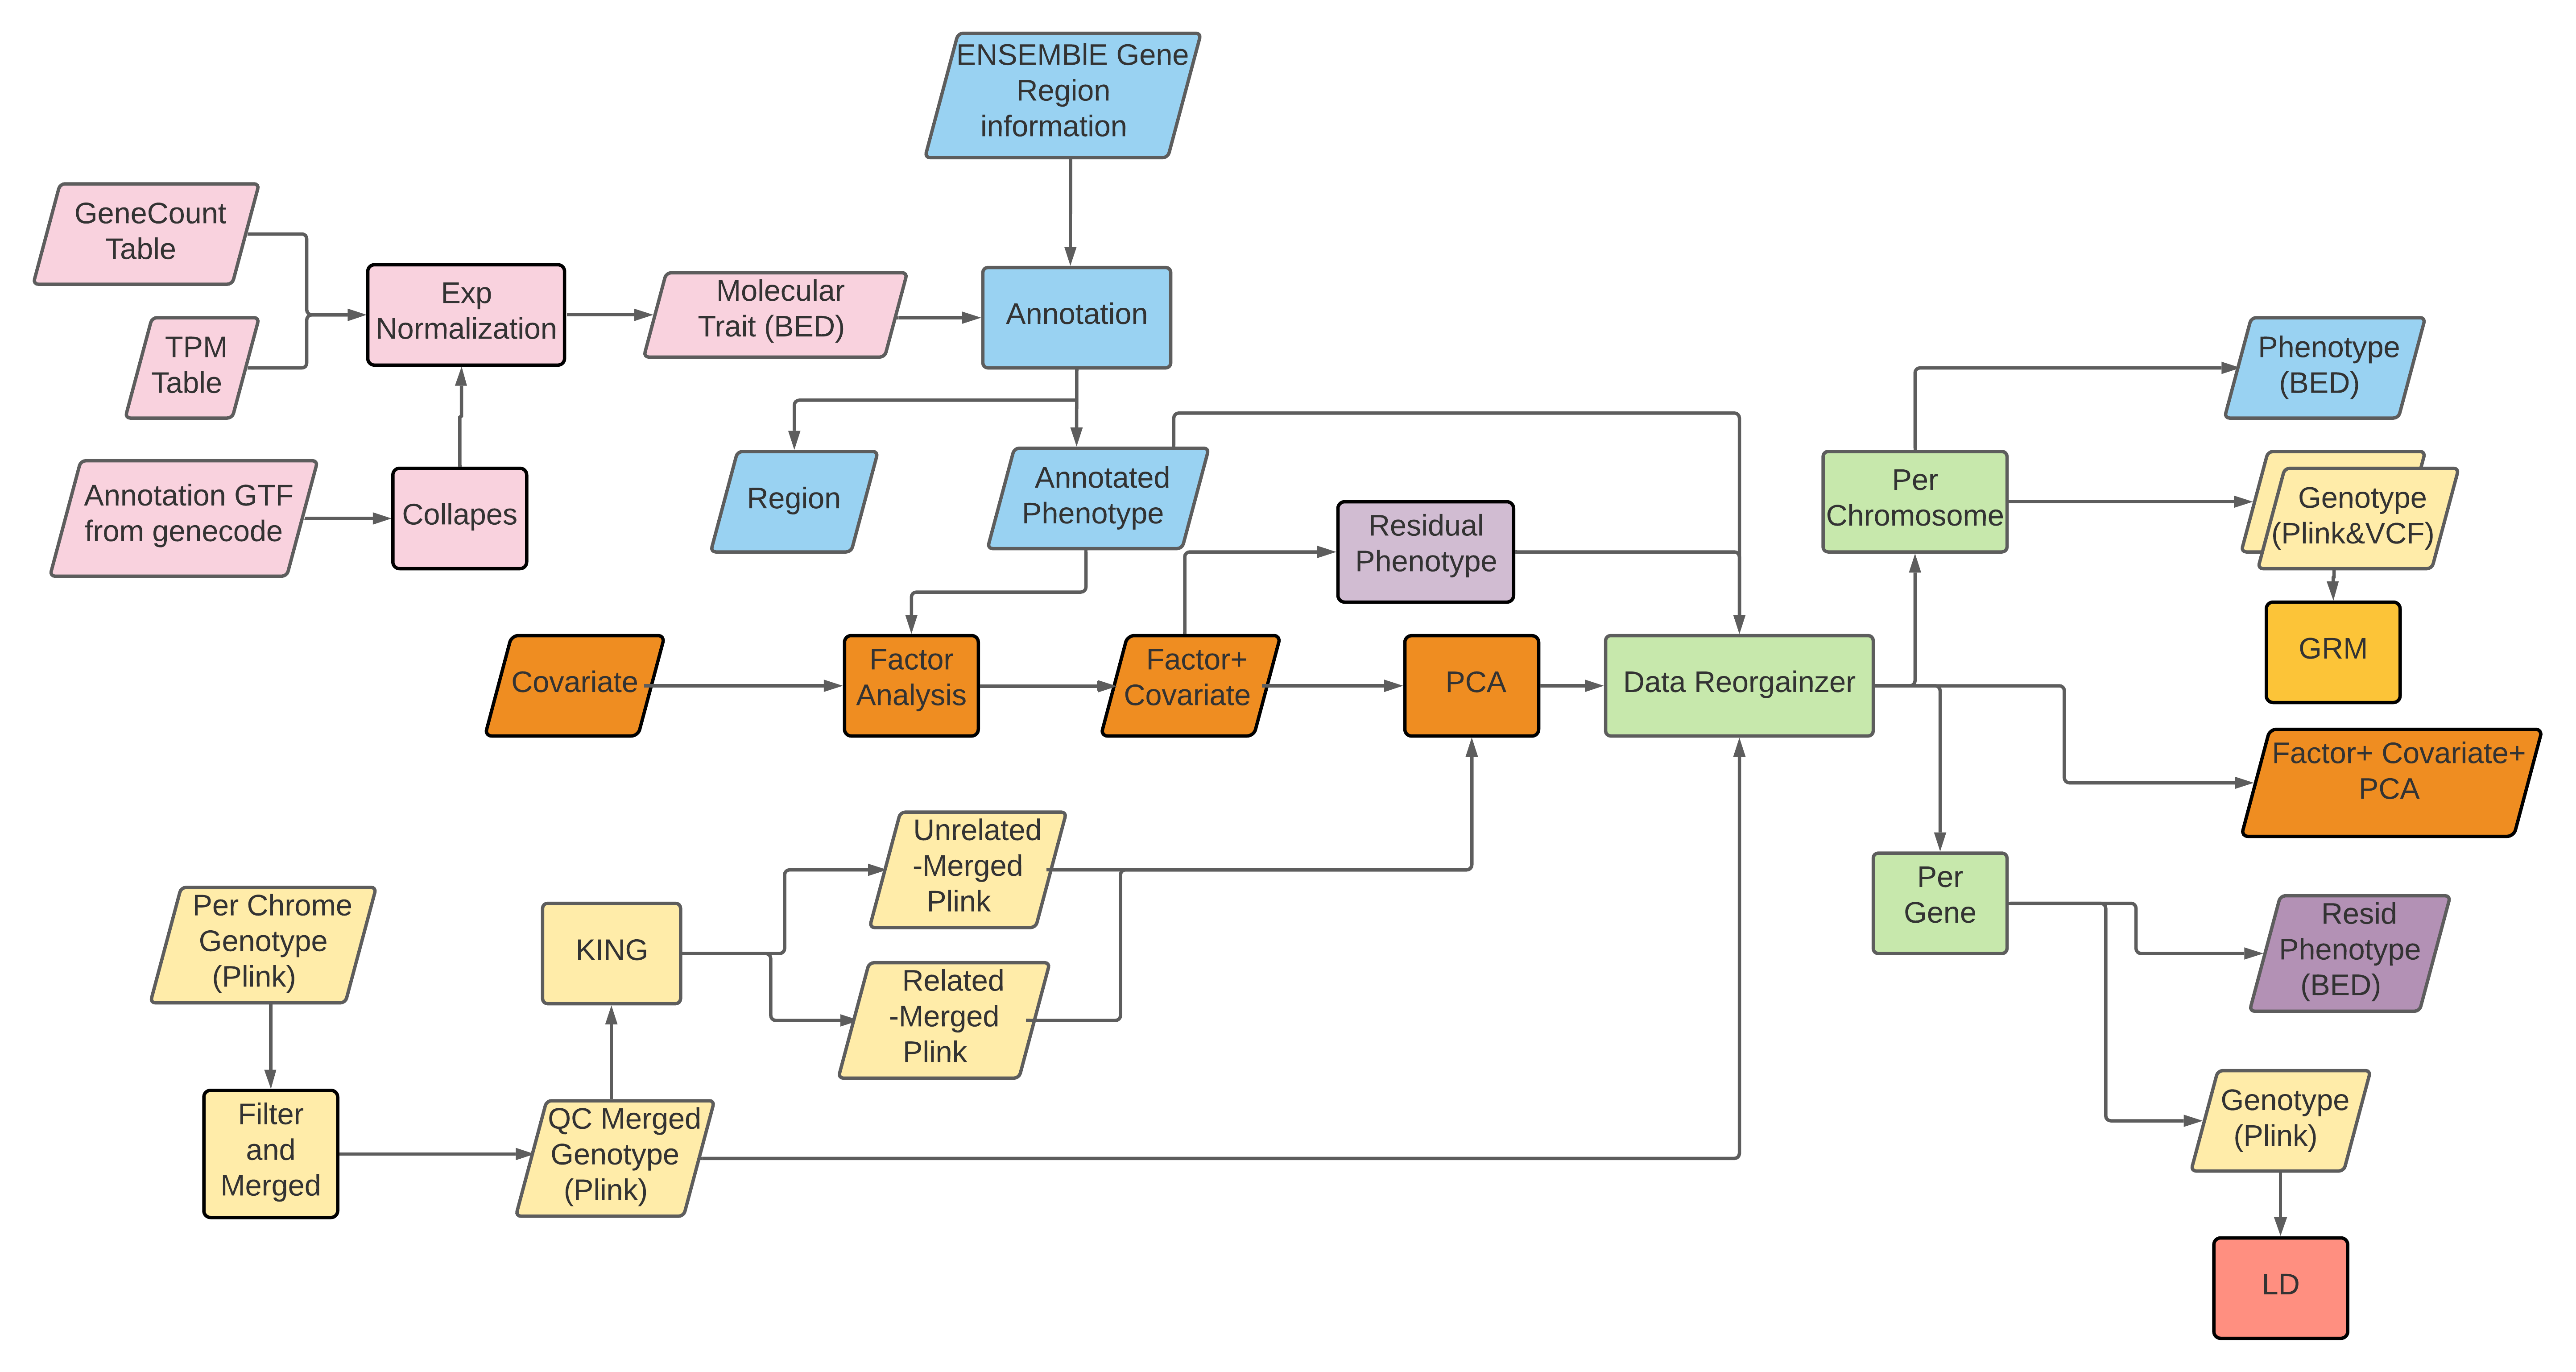

In [1]:
%preview ../images/data_preprocessing.png

## Normalization (pink)

In [ ]:
cd /mnt/mfs/statgen/xqtl_workflow_testing/module/normailzation
sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/normalization.ipynb collapse  \
--counts_gct "./geneCounts.gct"         --tpm_gct "./geneTpm.gct"        \
--vcf_chr_list "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/vcf_chrom_list"     \
--sample_participant_lookup "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/sampleSheetAfterQc.txt"      \
--name "demo"         --script_dir "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/" --wd ./       \
--annotation_gtf /mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/gencode.v26.annotation.gtf.gz \
--container /mnt/mfs/statgen/containers/xqtl_pipeline_sif/base-bioinfo.sif -s force &

## Annotation(Blue)
**This cannot be ran without internet connection (i.e. in an computational node)**

Ideally the input shall be the output of normalization, for the time being another similar file was used.



In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/annotation.ipynb annotation \
--molecular_pheno_whole /mnt/mfs/statgen/xqtl_workflow_testing/success_example/testing_10/Data_Processing/Phenotype/AC.mol_phe.bed  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/annotation  \
--name "demo" --container "/mnt/mfs/statgen/containers/xqtl_pipeline_sif/base-bioinfo.sif" &

In [ ]:
# ROSMAP
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/annotation.ipynb annotation \
--molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt \
--wd ./  \
--name "ROSMAP-AC" --container "/mnt/mfs/statgen/containers/xqtl_pipeline_sif/base-bioinfo.sif" &

## Residual_Expression(Purple)
When wengou's residual expression ready, use his, for the timebeing this works

In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/covariate/remove_covariates.ipynb Residual_Y \
--molecular_pheno_whole  /mnt/mfs/statgen/xqtl_workflow_testing/demo/annotation/AC.mol_phe.annotated.bed.gz \
--factor_covariate /mnt/mfs/statgen/xqtl_workflow_testing/success_example/testing_no_cov/Data_Processing/Factor_and_Covariate/AC.APEX.cov  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/residual_Y/ \
--name "demo" --container "/mnt/mfs/statgen/containers/xqtl_pipeline_sif/base-bioinfo.sif" &

## Phenotype reformmating(Green)

In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/phenotype_formatting.ipynb reformat \
--region_list /home/hs3163/GIT/ADSPFG-xQTL/MWE/mwe_region_long \
--molecular_pheno_whole /mnt/mfs/statgen/xqtl_workflow_testing/demo/residual_Y/demo.mol_phe.resid.bed.gz  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/phenotype_reformat/  \
--name "demo" --container "/mnt/mfs/statgen/containers/xqtl_pipeline_sif/base-bioinfo.sif" &